In [67]:
from keras.datasets import boston_housing
import numpy as np
from keras import models, layers, optimizers, losses, metrics

def build_model(activation_name='relu'):
  network = models.Sequential()
  network.add(layers.Dense(40, activation=activation_name, input_shape=(13,)))
  network.add(layers.Dense(20, activation=activation_name))
  network.add(layers.Dense(20, activation=activation_name))
  network.add(layers.Dense(1))

  network.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])

  return network

In [63]:
(train_samples, train_labels), (test_samples, test_labels) = boston_housing.load_data()

train_mean = train_samples.mean(axis = 0)
train_std = train_samples.std(axis=0)

train_samples = (train_samples - train_mean)/train_std
test_samples = (test_samples - train_mean)/train_std

In [68]:
K = 5
EPOCHS = 400
mae_history = []

val_set_size = len(train_samples)//K
for i in range(K):
  start = val_set_size*i
  end = val_set_size*(i+1)

  X_val = train_samples[ start:end ]
  Y_val = train_labels[ start:end ]

  X_train = np.concatenate(( train_samples[:start], train_samples[end:] ))
  Y_train = np.concatenate(( train_labels[:start], train_labels[end:] ))

  model = build_model('elu')

  history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=64, validation_data = (X_val, Y_val), verbose=False)

  mae_history.append( history.history['val_mean_absolute_error'] )

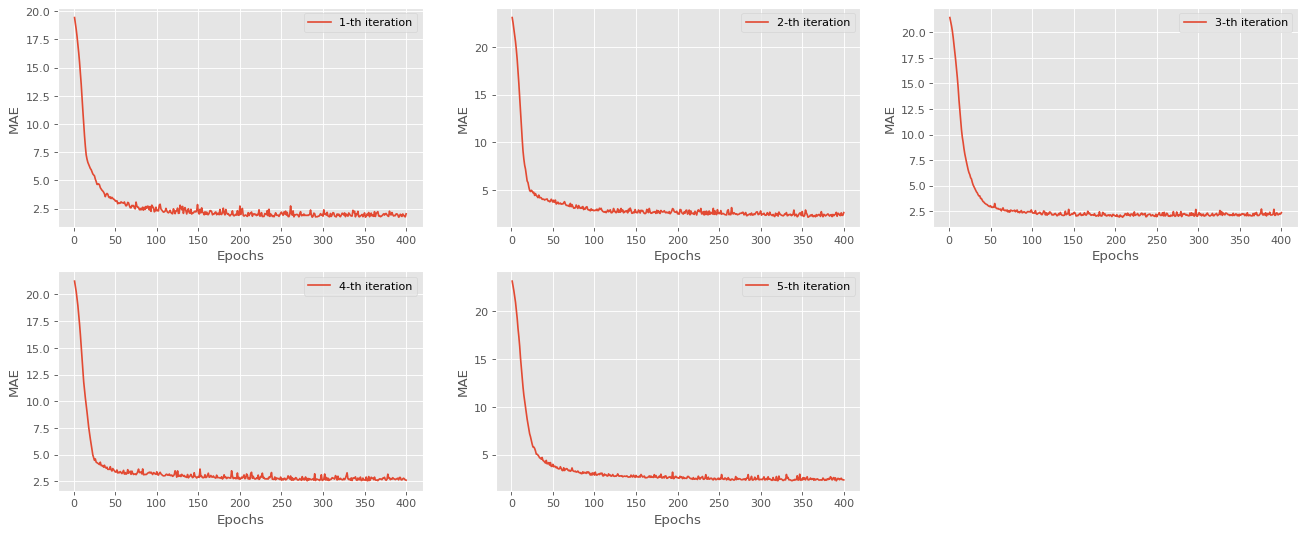

In [70]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,8), dpi=80)
epochs = range(1, EPOCHS+1)

for i in range(K):
  plt.subplot(2,3,i+1)
  plt.plot(epochs, mae_history[i], label=f'{i+1}-th iteration')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend(loc='upper right')

plt.show()

2.23379647731781 290


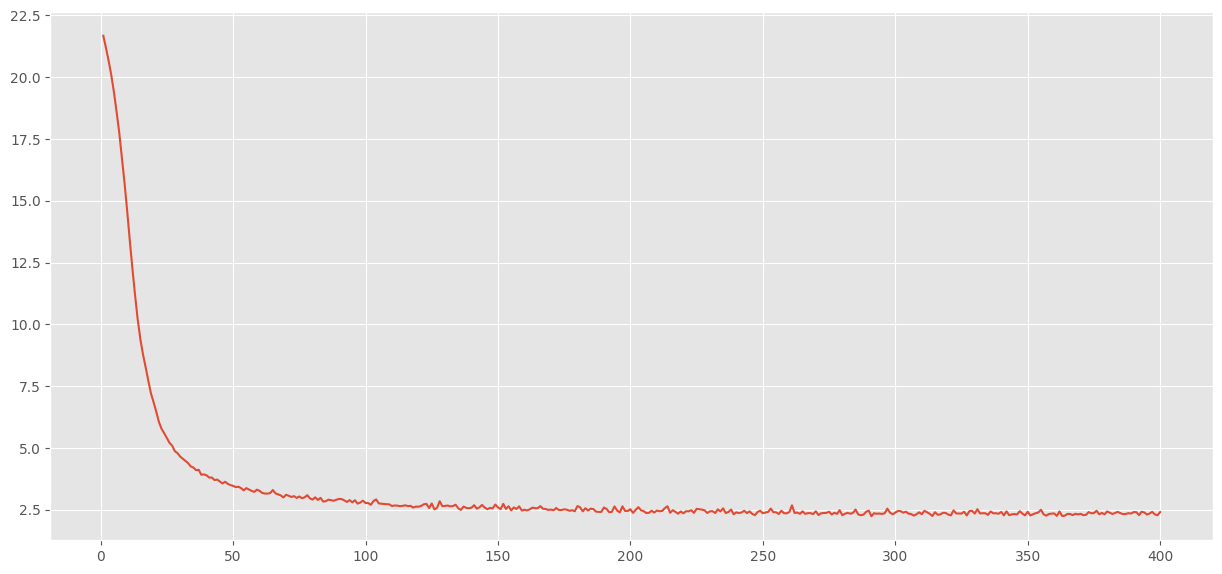

In [69]:
epochs = range(1, EPOCHS+1)
mae_hist_avg = np.asarray(mae_history).mean(axis=0)
plt.figure(figsize=(15,7),dpi=100)
plt.plot(epochs, mae_hist_avg)
minarg = np.argmin(mae_hist_avg)
print(mae_hist_avg[minarg], minarg)